In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [212]:
# read the dataset
country = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [213]:
# Converting Exports, Imports and Health into actuals instead of percentage of GDPP

In [214]:
country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100

In [215]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### basics of the df


In [216]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### All Data Types look relavent at first glance. Let's look further to know if there are any null data present in input given 

### Inspecting Country Data Dataframe

In [217]:
country.shape

(167, 10)

## Task 2: Cleaning Data
###           Sub Task 2.1 Inspect Null Values

In [218]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Looks like source data is clean and has no null values. Good News!!

### Sub Task 2.2 - Performing EDA
#### Let's run few plots to perform EDA to visualize how data looks like from source dataframe

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

##### Reading CSV to a dummy Dataframe so that original structure is not disturbed.
##### Here I am trying to BIN all continous numeric variables so that I can do EDA

In [220]:
inp = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
inp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [221]:
inp['Mortality']= pd.cut(inp.child_mort, [0,10,20,30,40,50,60,70,80,90,100,120], labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100","100-120"])
inp.Mortality.value_counts(normalize=True)
inp.Mortality.value_counts()

0-10       47
10-20      39
20-30      16
100-120    10
60-70      10
30-40      10
90-100      7
50-60       7
80-90       5
40-50       5
70-80       4
Name: Mortality, dtype: int64

In [222]:
inp.Mortality.value_counts(normalize=True)
inp.Mortality.value_counts()

0-10       47
10-20      39
20-30      16
100-120    10
60-70      10
30-40      10
90-100      7
50-60       7
80-90       5
40-50       5
70-80       4
Name: Mortality, dtype: int64

#### 86 Countries have child mortality rate less than 20. With increase of morality rate, number of countries accompanying mortality rate are decreasing. There's one country whose Child mortality rate is severe and greater than 200

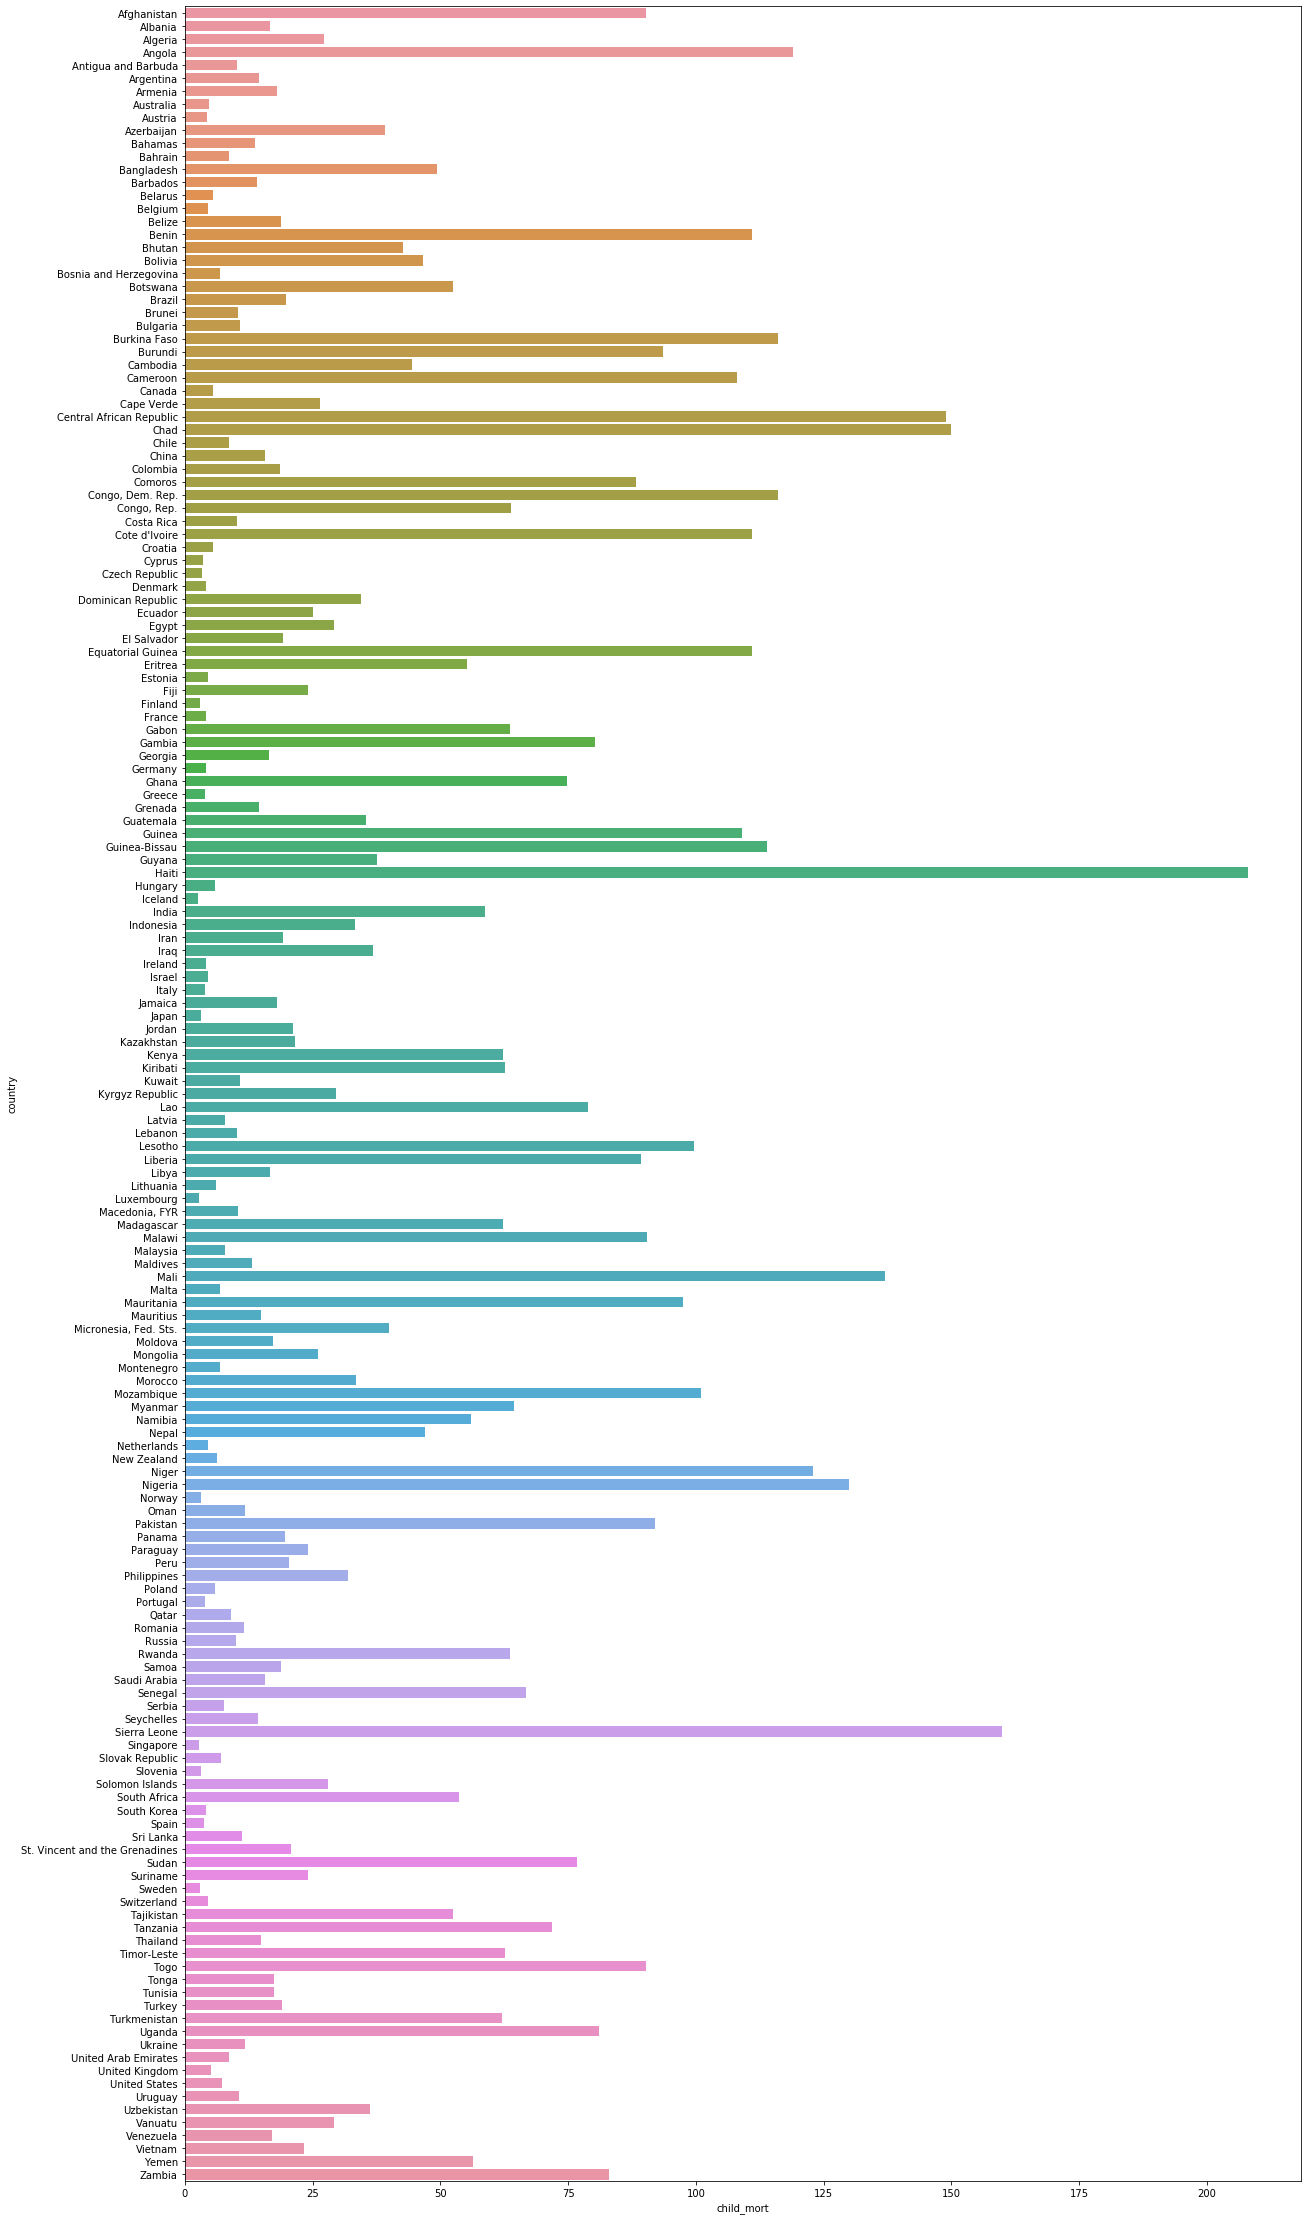

In [223]:
plt.figure(figsize = (20,40))
sns.barplot(x ='child_mort', y ='country', data=inp)
plt.show()

### Haiti is the country with highest child mortality rate. Sierra Leone being second highest country with highest mortality rate

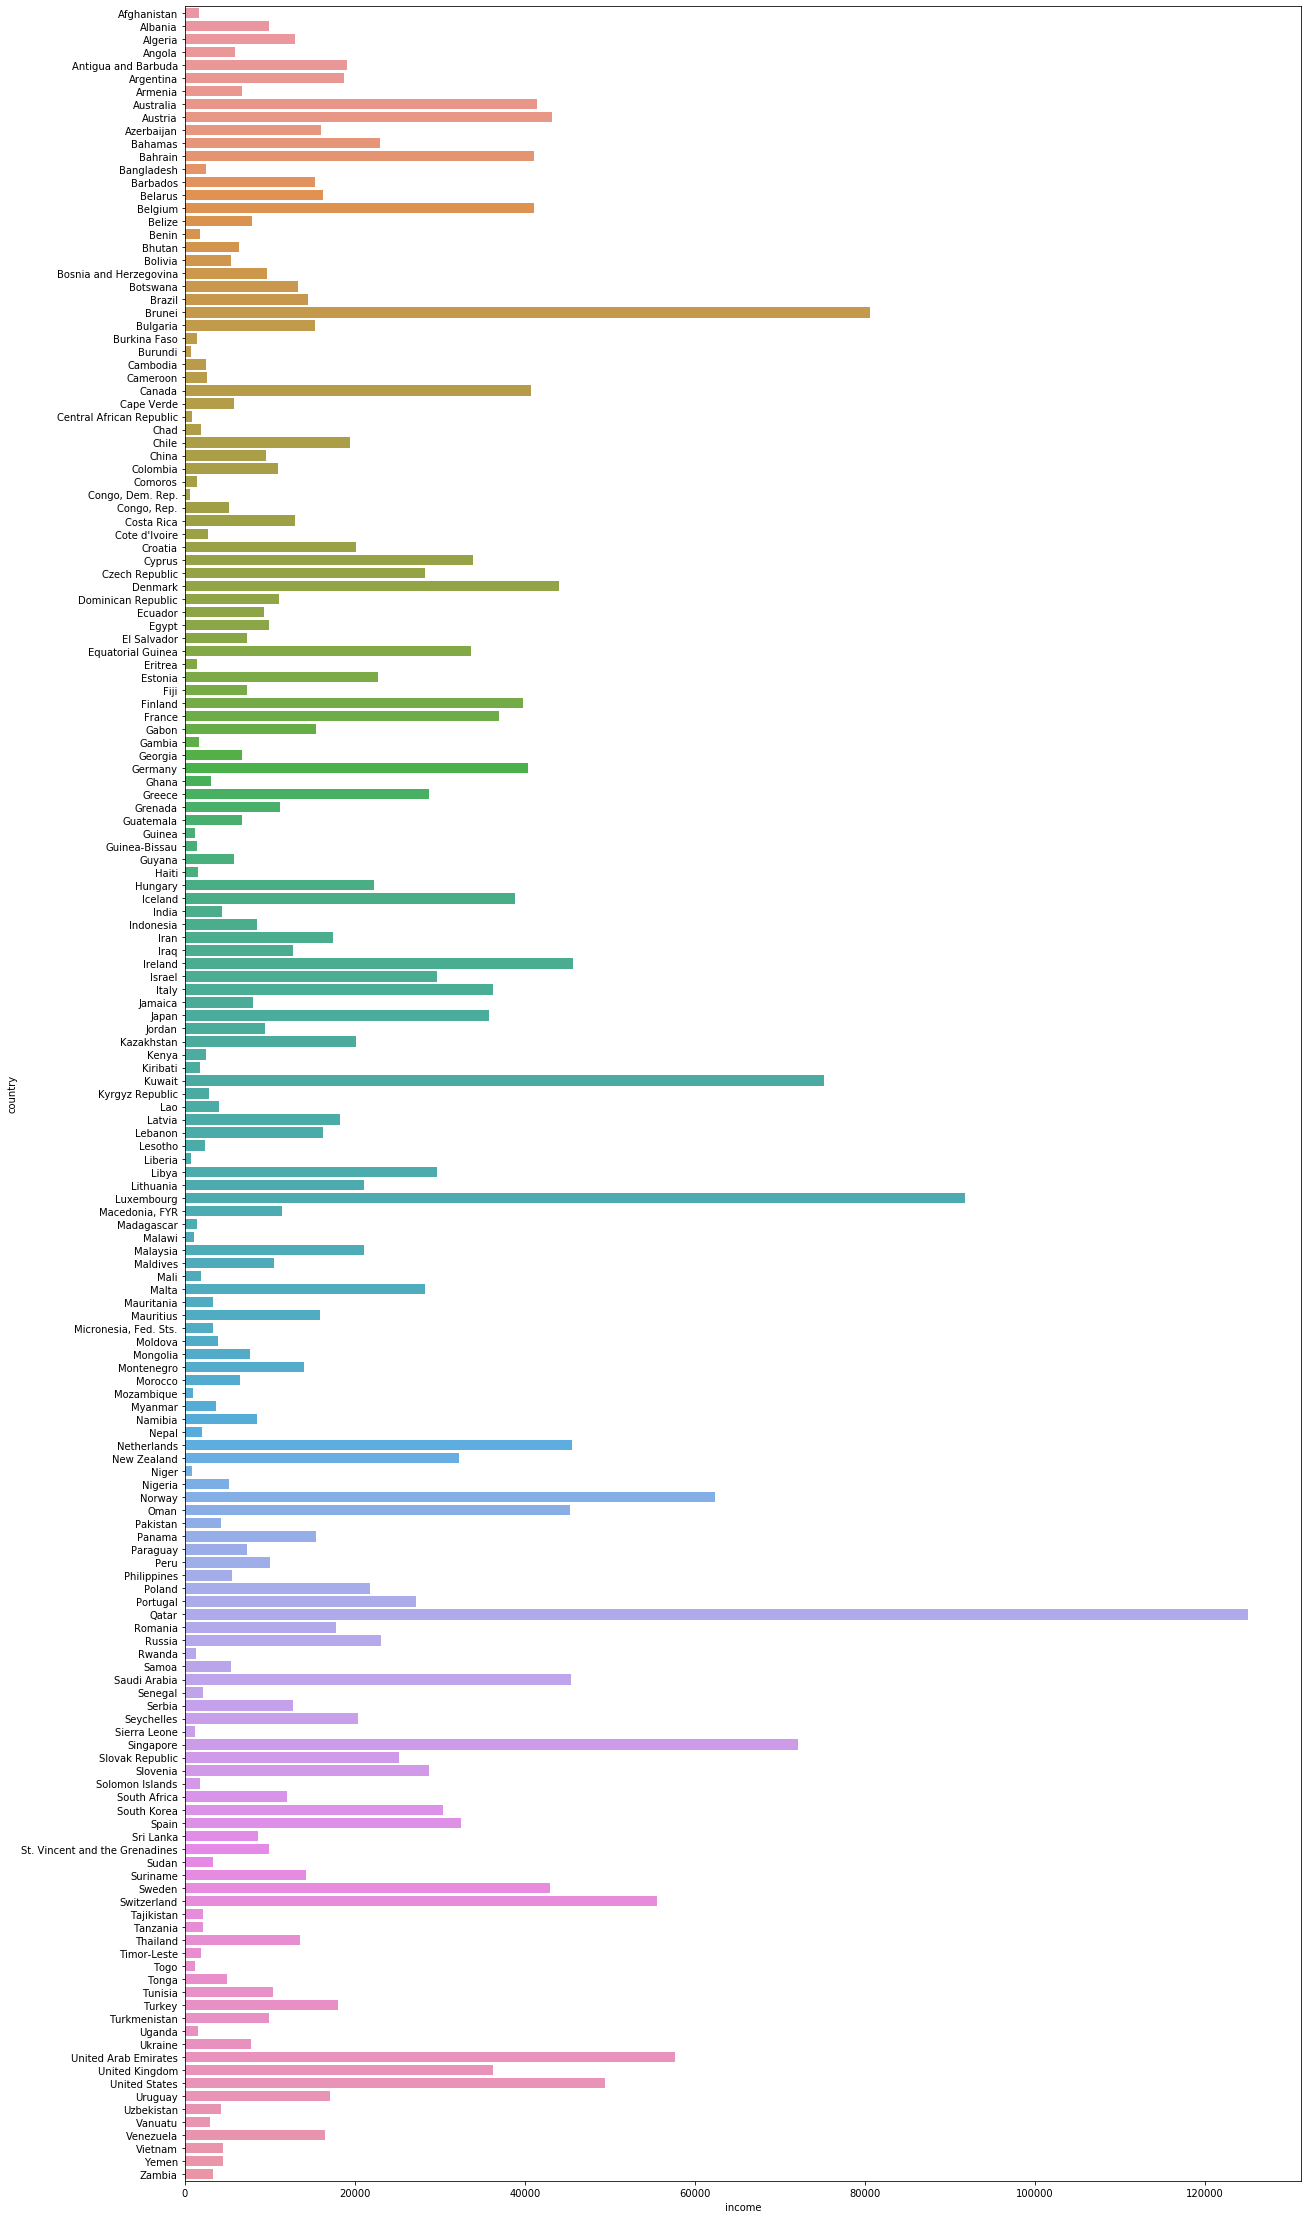

In [224]:
plt.figure(figsize = (20,40))
sns.barplot(x ='income', y ='country', data=inp)
plt.show()

#### Qatar, Luxemborg, Kuwait, Singapore among top Net Income countries while most African countries are among least Net Income countries, like Congo Dem Rep, Liberia, Niger

In [225]:
inp['life']= pd.cut(inp.life_expec, [0,30,40,50,60,70,80,90,100], labels=["0-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"])
inp.life.value_counts(normalize=True)
inp.life.value_counts()

70-80     77
60-70     43
80-90     23
50-60     21
40-50      2
30-40      1
90-100     0
0-30       0
Name: life, dtype: int64

### No country has got life expectancy at exteme high or low. i.e less than 30 and greater than 90. Most countries have 70-80 as life expectancy, while 1 country has 30-40.

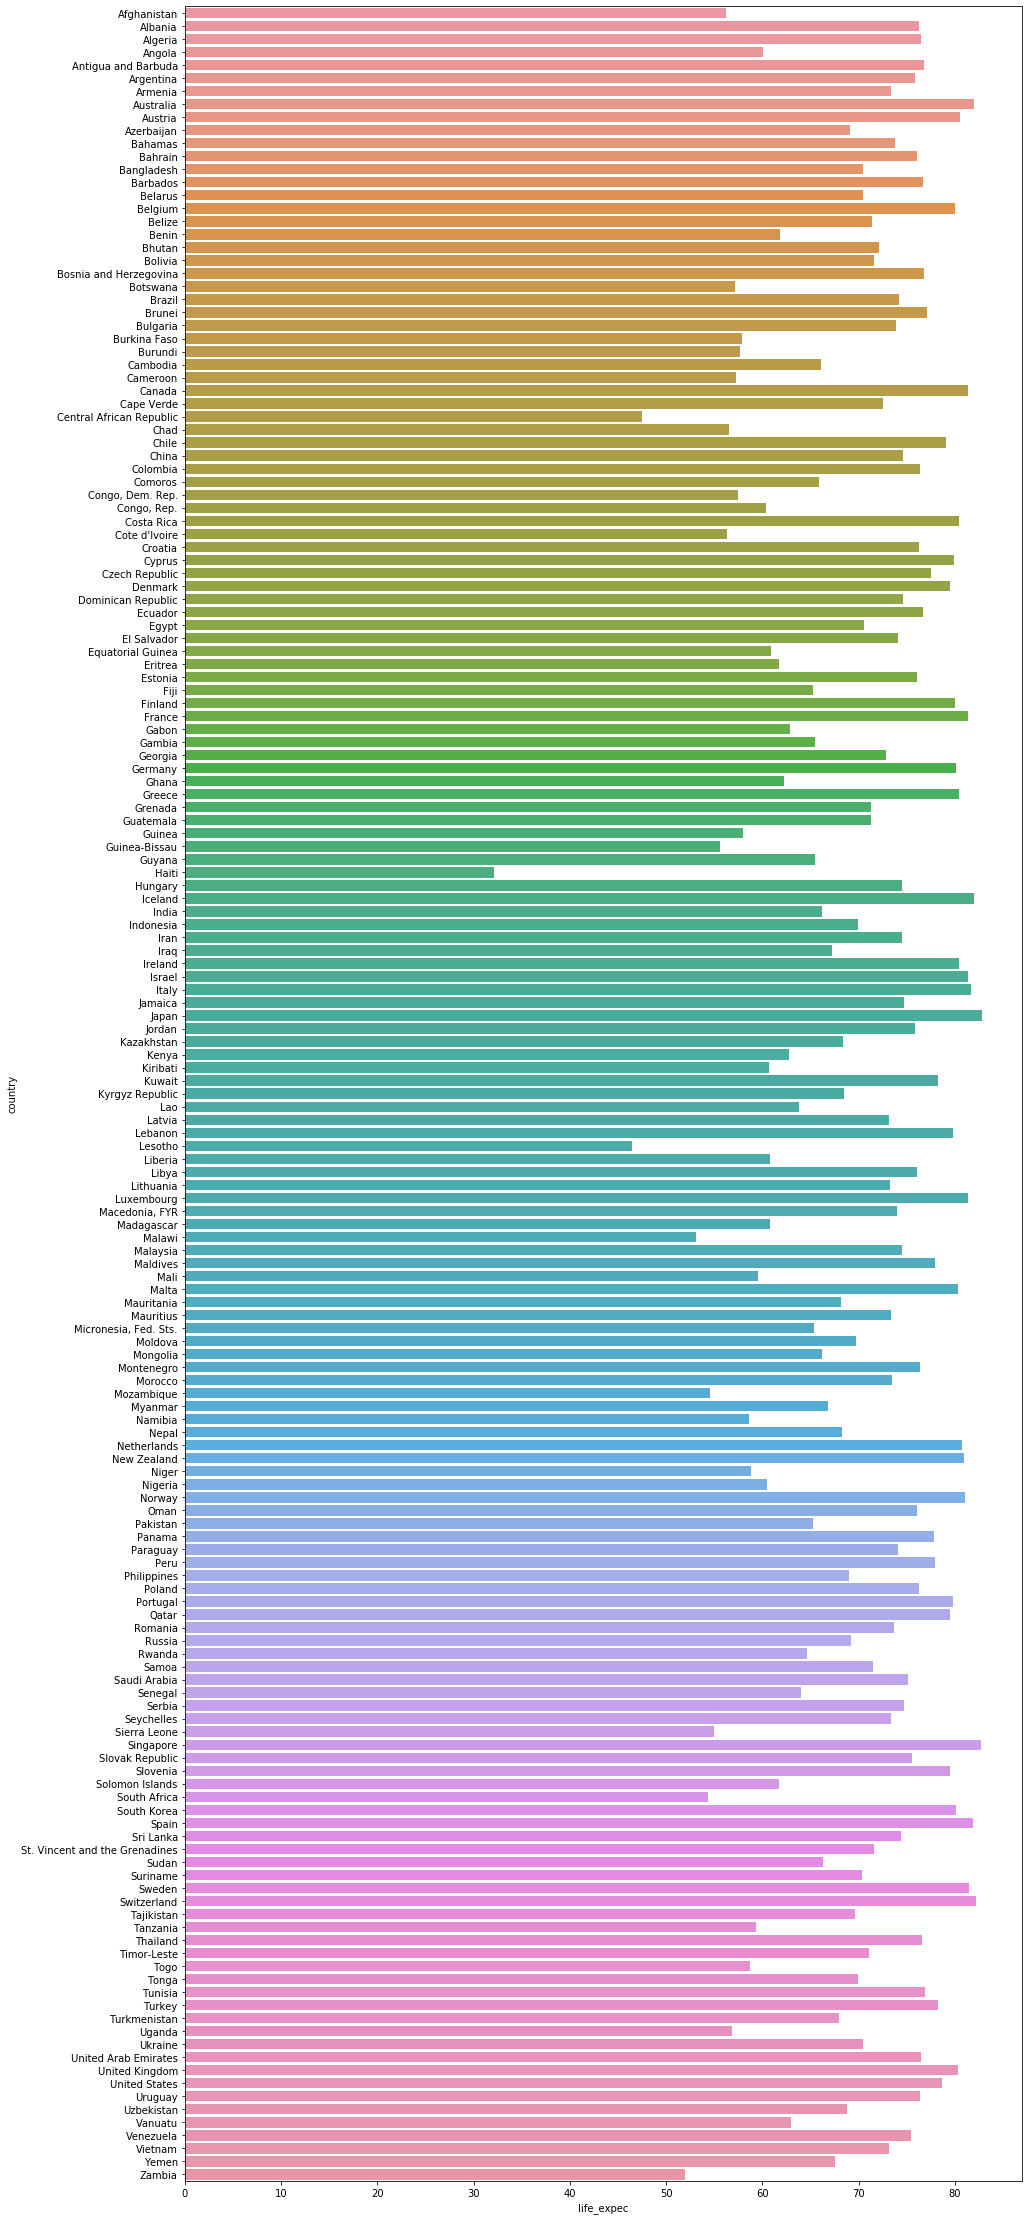

In [226]:
plt.figure(figsize = (15,40))
sns.barplot(x ='life_expec', y ='country', data=inp)
plt.show()

### Japan, Singapore, Australia, Iceland countries have highest life expectancy. Haiti has got least life expectancy.

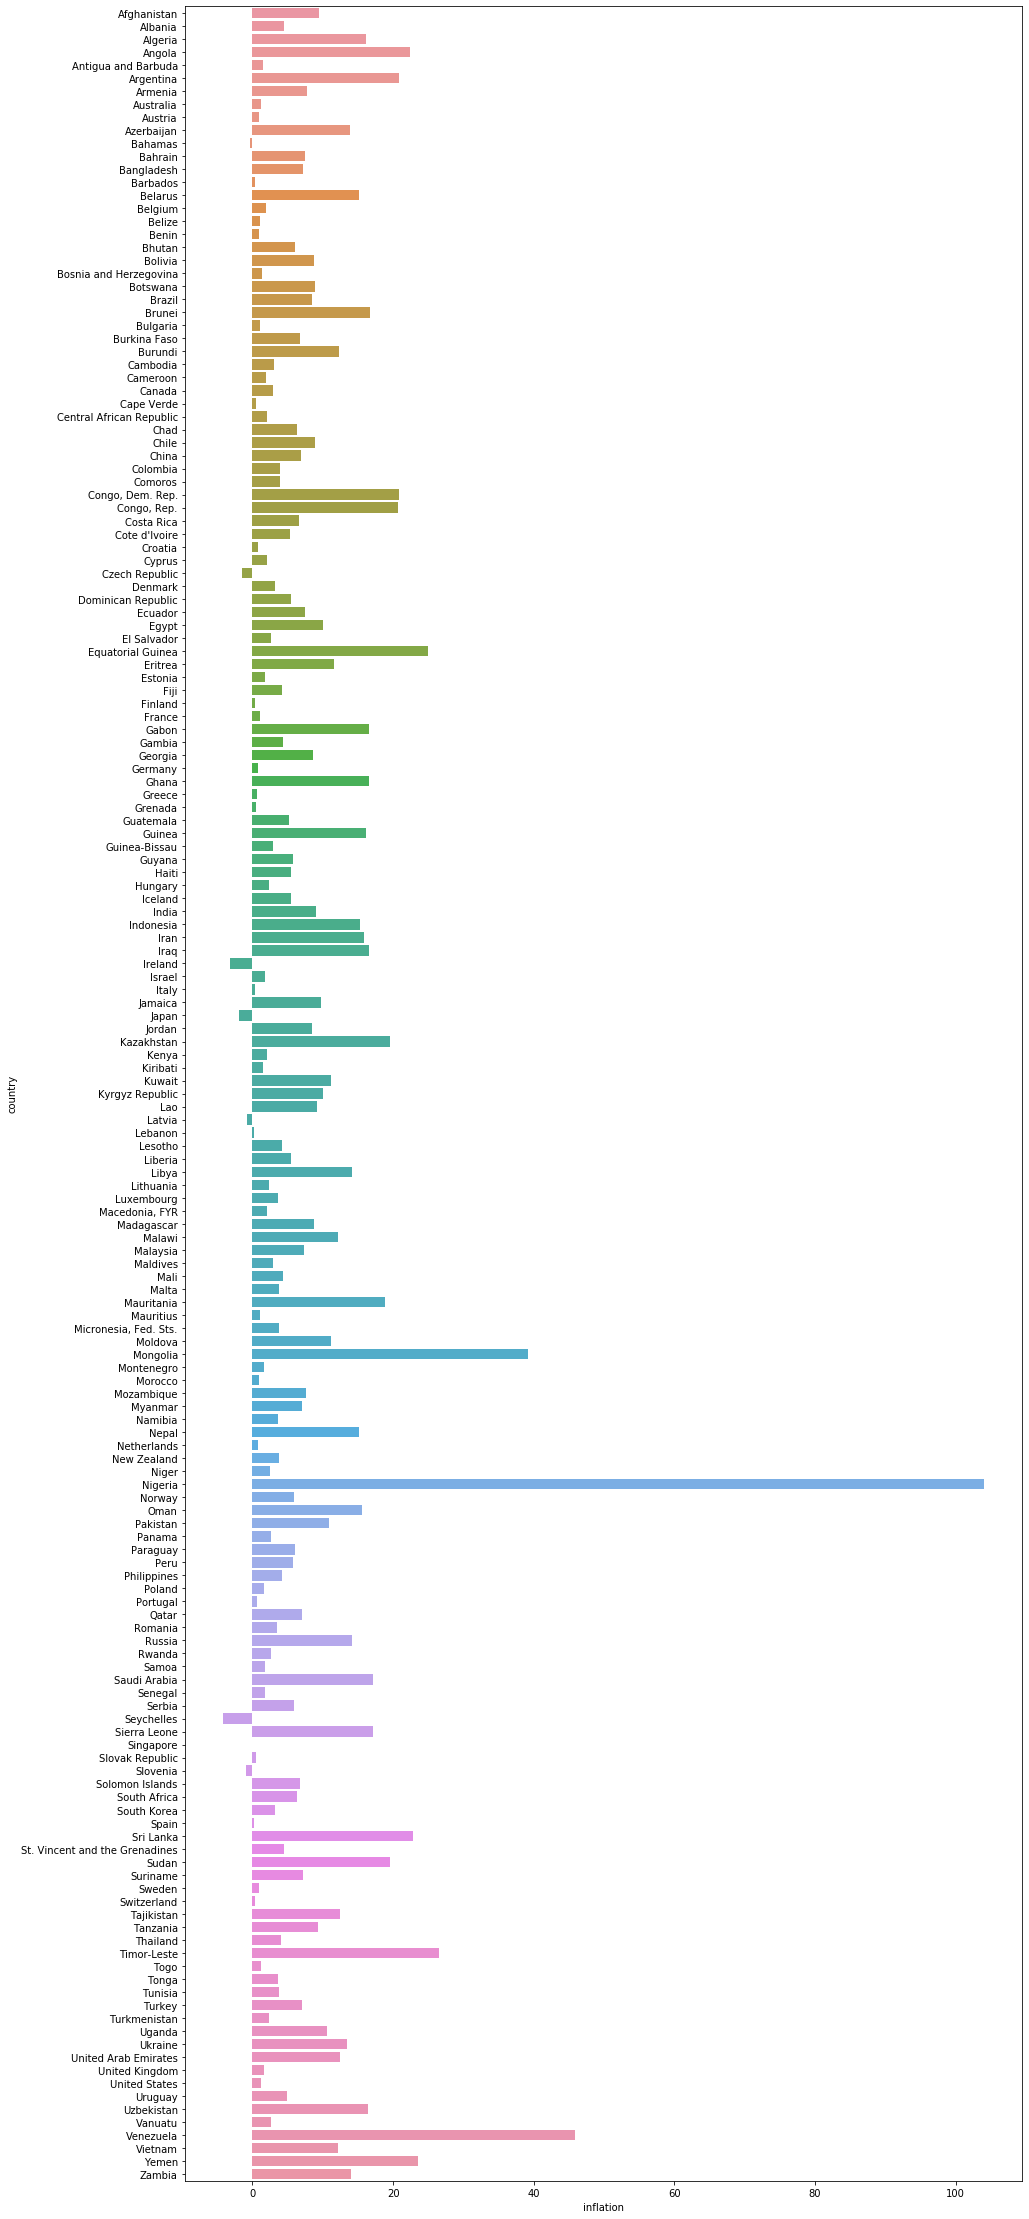

In [227]:
plt.figure(figsize = (15,40))
sns.barplot(x ='inflation', y ='country', data=inp)
plt.show()

#### Nigeria has got undesirably highest inflation, followed by Venezuela owning to their crisis. Next by Mongolia. Among least inflated nations, Seychelles, Ireland are standing in top 2.

In [228]:
inp['gdp']= pd.cut(inp.gdpp, [0,5000,10000,15000,20000,25000,30000,40000,70000,100000], labels=["0K-5K","5K-10K","10K-15K","15-20K","20-25K","25K-30K","30K-40K","40K-70K","70K-100K"])
inp.gdp.value_counts(normalize=True)
inp.gdp.value_counts()

0K-5K       85
5K-10K      25
10K-15K     16
40K-70K     15
30K-40K      9
15-20K       6
20-25K       5
70K-100K     3
25K-30K      2
Name: gdp, dtype: int64

#### Most of countries GDP fall in between 0-5K. 3 countries could be termed as very rich countries have GDP > 70K

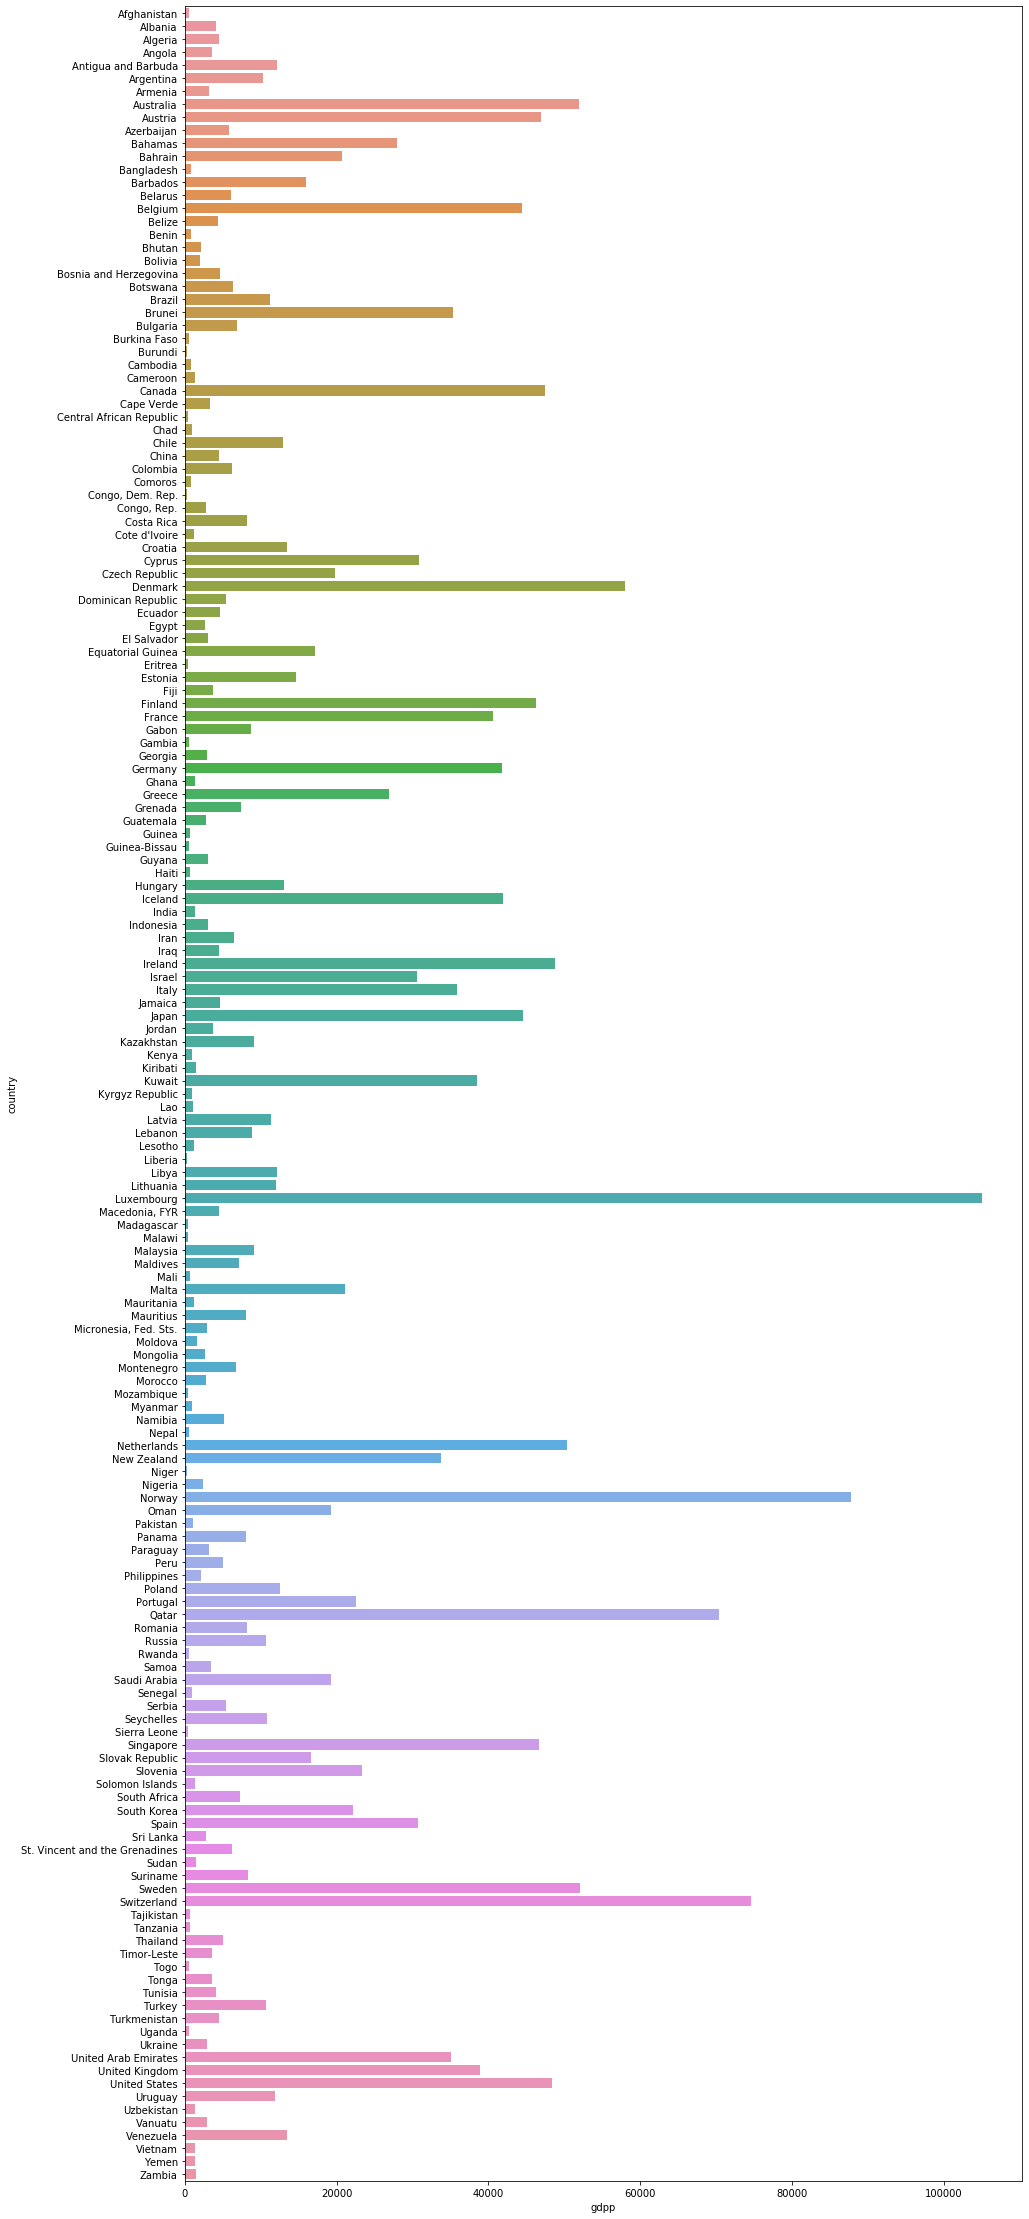

In [229]:
plt.figure(figsize = (15,40))
sns.barplot(x ='gdpp', y ='country', data=inp)
plt.show()

#### Luxembourg has got highest GDP, followed by Norway. European countries swag this GDP area. Least coming from African countries like Niger, Liberia, Eritrea and Congo, Dem Rep, Burunndi.

<Figure size 1080x2880 with 0 Axes>

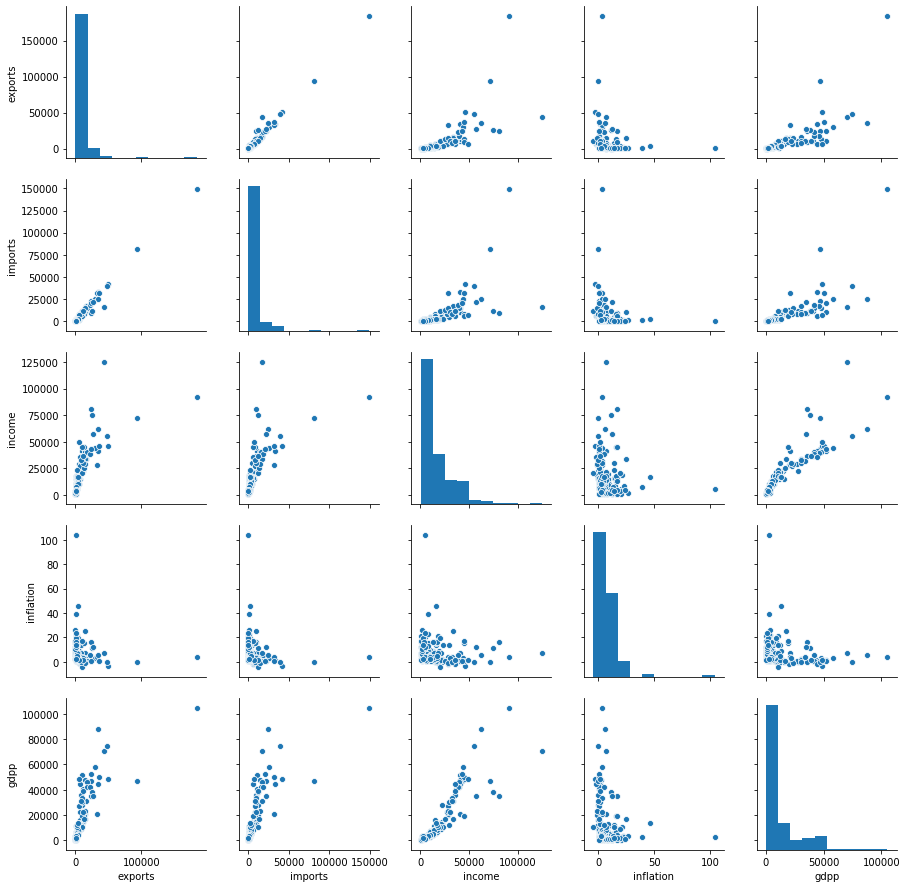

In [230]:
plt.figure(figsize = (15,40))
sns.pairplot(data=country, vars=["exports", "imports", "income", "inflation", "gdpp"])
plt.show()

### There's a strong co-relation between Imports and Exports pair plot

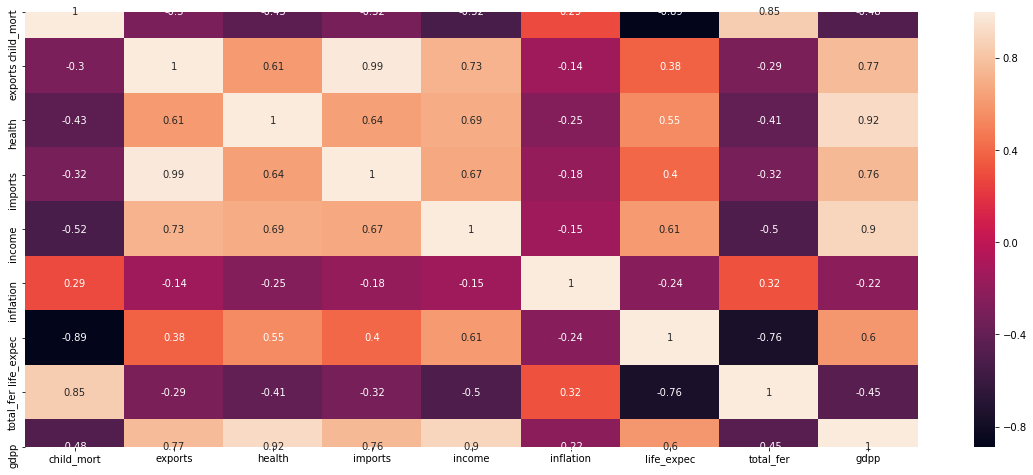

In [231]:
plt.figure(figsize = (20,8))        
sns.heatmap(country.corr(),annot = True)

### Strong relations obsered -
#### GDPP - Health
#### GDPP - Income
#### Income - Exports
#### Imports - Exports
#### Negatively Life Expectation - Total Fertility
#### Negatively Life Expectation - Child Mortality
#### Highest Co-relation between Exports , Imports
#### Child Mortality - Total Fertility

## SubTask 2.3 - Finding Outliers

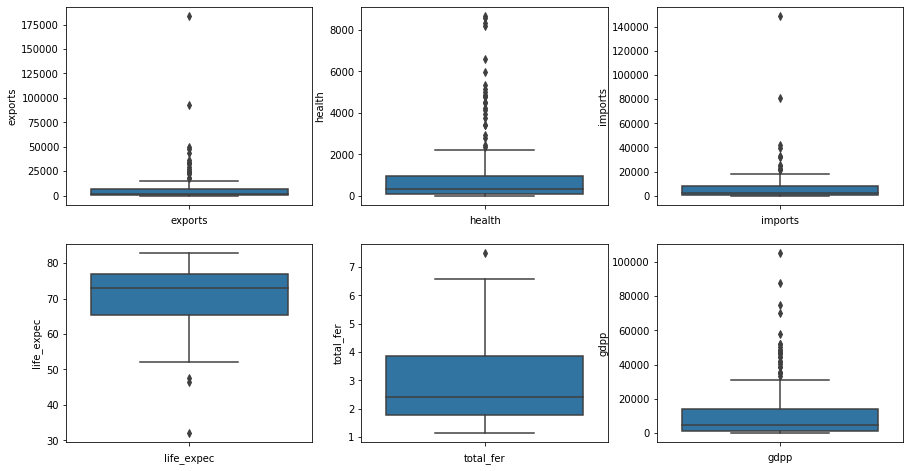

In [232]:
varia =["exports", "health", "imports", "life_expec", "total_fer", "gdpp"]
i=1
plt.figure(figsize = (15,8))
for x in varia:
    plt.subplot(2,3,i)
    sns.boxplot(y  = country[x])
    plt.xlabel(x)
    i+=1
plt.show()

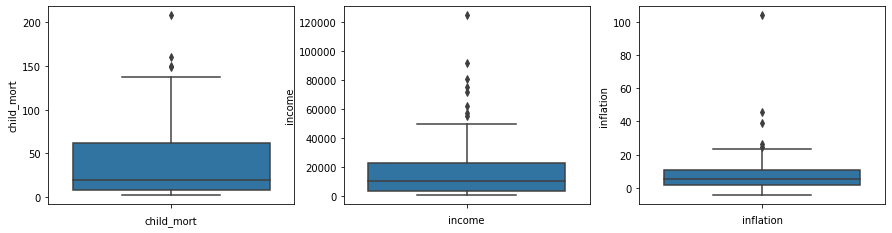

In [233]:
varia =["child_mort", "income", "inflation"]
i=1
plt.figure(figsize = (15,8))
for x in varia:
    plt.subplot(2,3,i)
    sns.boxplot(y  = country[x])
    plt.xlabel(x)
    i+=1
plt.show()

### Few observations on identified outliers:
### Child Mortality seen more 200 in one country. Which is far higher than previous highest and median of    dataframe
### Luxembourg country records highest income. Way far from median.
### Severe Inflation seen in one of African countries.
### Typically different outlier seen in downside of life expectancy noticed.
### GDPP of Luxembourg is terrificly high compared to others.
### Singapore, Luxembourg, Malta stand tall among others w.r.t Import and Exports.
## All of these are data that explains the current affairs and situations are country which are important to analyze and conclude about data. None of these can be treated as outlier at this stage. That is their original data hence , at this moment I am not removing any of them, instead I'll cap or treat them using a new dataset.

In [234]:
numerics= ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
country_num = country[numerics]
country_num

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


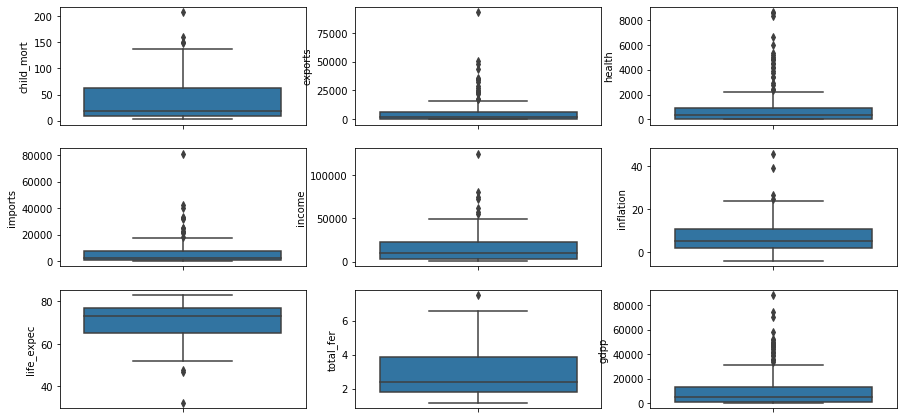

In [235]:
#Performing Outlier treatment only for 1% and 99%
for x in country_num.columns:
    q1,q3 = np.quantile(country[x], [0.01,0.99])
    iqr = q3-q1
    country_num = country_num[(country_num[x] > q1-1.5*iqr) & (country_num[x] < q1+1.5*iqr) ]
#Plotting plots once again after outlier treatment
plt.figure(figsize = (15,10))
i=1
for x in numerics:
    plt.subplot(4,3,i)
    sns.boxplot(y = country_num[x])
    i+=1
plt.show()

## Hopkins

In [236]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [237]:
hopkins(country.drop(['country'],axis=1))

0.9636097370915773

In [238]:
hopkins(country_num)

0.9155987254937993

### Hopkins is a technic to identify how is test data different to random data picked from dataset. Anything greater than 70% is a good omen. At this instance we see > 90% which is a good sample to proceed.

## 3. Prepare the data for modelling

## Scaling Data

In [239]:
countrys = country[numerics]
countrys

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [240]:
# 2. rescaling

# instantiate
scaler = StandardScaler()

# fit_transform
countrys = scaler.fit_transform(countrys)
countrys.shape

(167, 9)

In [241]:
countrys = pd.DataFrame(countrys)
countrys.columns= ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
countrys.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [242]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [243]:
hopkins(countrys)

0.896158730968954

In [244]:
### Hopkins is a technic to identify how is test data different to random data picked from dataset. Anything greater than 70% is a good omen. At this instance we see > 90% which is a good sample to proceed.

## 4. Modelling

In [245]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter = 500, random_state = 100 )
kmeans.fit(countrys)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [246]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

## Finding the Optimal Number of Clusters

### SSD

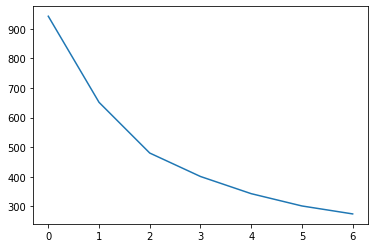

In [247]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countrys)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### As per this plot, no further drop in curve is seen after 2. Which suggests me to take 4 clusters. Let's conclude after Silhouette Analysis as well.

### Silhouette Analysis

In [248]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countrys)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countrys, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.3647487710490948
For n_clusters=7, the silhouette score is 0.3088213069762049
For n_clusters=8, the silhouette score is 0.29585776692669113


### I see silhouette score drops continously till number of clusters 4 where it attains stability and further gone score shows up and down spikes. K=4 where its an end for decreasing streak. So I choose 4 as cluster number which is congruent with SSD.

In [249]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter = 500, random_state = 100 )
kmeans.fit(countrys)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [250]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [251]:
# assign the label
country['cluster_id'] = kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


### Perfoming Cluster Profiling for K = 4

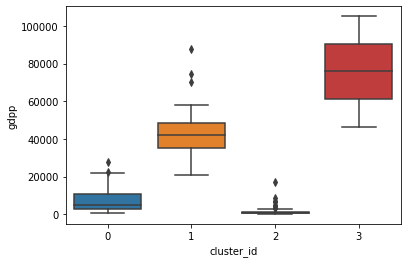

In [252]:
### Cluster Profiling based on K mean groups
sns.boxplot(x='cluster_id', y='gdpp', data=country)

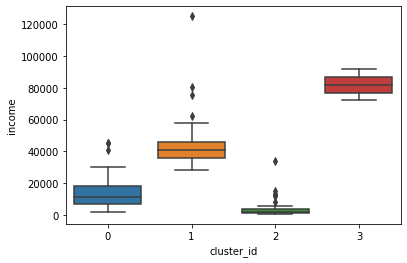

In [253]:
### Cluster Profiling based on K mean groups
sns.boxplot(x='cluster_id', y='income', data=country)

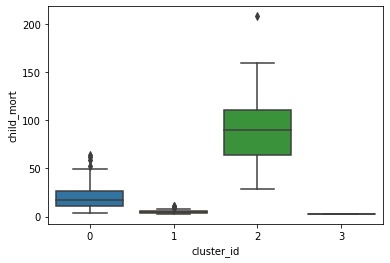

In [254]:
sns.boxplot(x='cluster_id', y='child_mort', data=country)

## Its evidently seen Cluster 1 is our target now. Seemingly with high Child Mortality, low Income and low GDPP , this cluster is our candidate that needs immediate aid.

### Finding out top 5 countries that needs aid based on Income 

In [255]:
country[(country.cluster_id==2)].sort_values(by = 'income', ascending  = True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2


### Finding out top 5 countries that needs aid based on high Child Mortality 

In [256]:
country[(country.cluster_id==2)].sort_values(by = 'child_mort', ascending  = False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2


### Finding out top 5 countries that needs aid based on GDPP 

In [257]:
country[(country.cluster_id==2)].sort_values(by = 'gdpp', ascending  = True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2


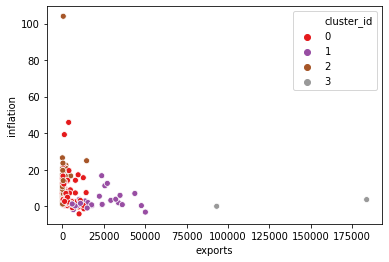

In [258]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'exports', y = 'inflation', hue ='cluster_id', legend = 'full', data = country, palette='Set1')

### Oh, cluster 2 is hit with high inflation and less exports as much as cluster 0. Both appear similar in terms of exports which are low as well.

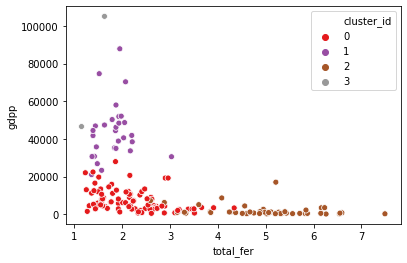

In [259]:
sns.scatterplot(x = 'total_fer', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country, palette='Set1')

### Surprisingly, Total Fertility rate is good with Cluster 2 while their GDPP is lower than any other cluster

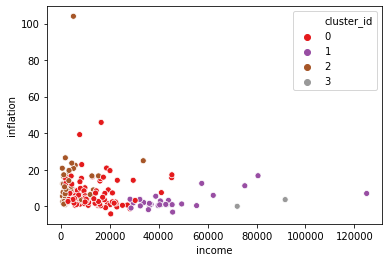

In [260]:
sns.scatterplot(x = 'income', y = 'inflation', hue ='cluster_id', legend = 'full', data = country, palette='Set1')

### Inflation is seen more in Cluster 0, seen little lesser in Cluster 2 compared to Cluster 0. Minimally seen in Cluster 1. However Cluster 0, 2 although record low income with high inflation.

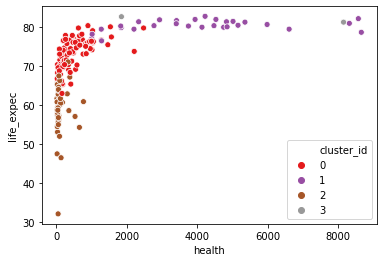

In [261]:
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_id', legend = 'full', data = country, palette='Set1')

### Higher the spend, predominantly higher is life expectation. Cluster 2's life expectency and spend on health is low

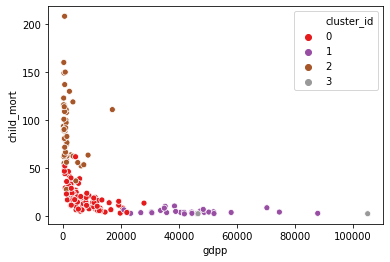

In [262]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = country, palette='Set1')

### Not alright to finally see Cluster 2 topping the list. GDPP is low with it along with high child mortality. 

## Hierarchical Clustering

In [263]:
#Read dataset once again afresh..
# read the dataset
countryo = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
countryo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [264]:
countryo['exports'] = countryo['exports']*countryo['gdpp']/100
countryo['imports'] = countryo['imports']*countryo['gdpp']/100
countryo['health'] = countryo['health']*countryo['gdpp']/100

In [265]:
countryo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [266]:
countrys.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [267]:
# 2. rescaling
rfm_df = countryo[numerics]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [268]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns= ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


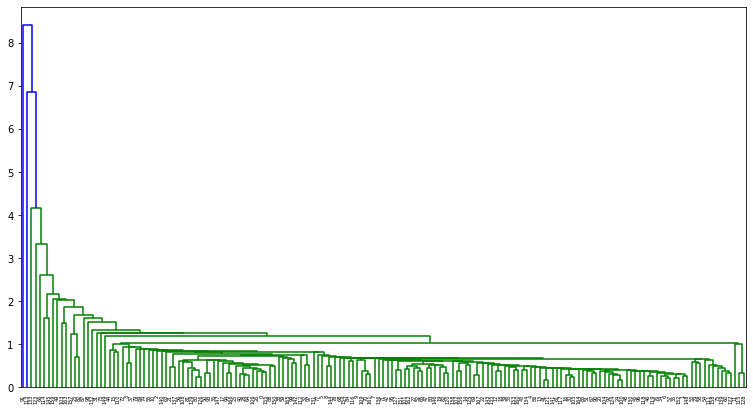

In [269]:
# single linkage
plt.figure(figsize = (13,7))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### Single clustering here is identifying closely distant clusters which usually doesn't produce right results, hence let's consider using complete linkage method. 

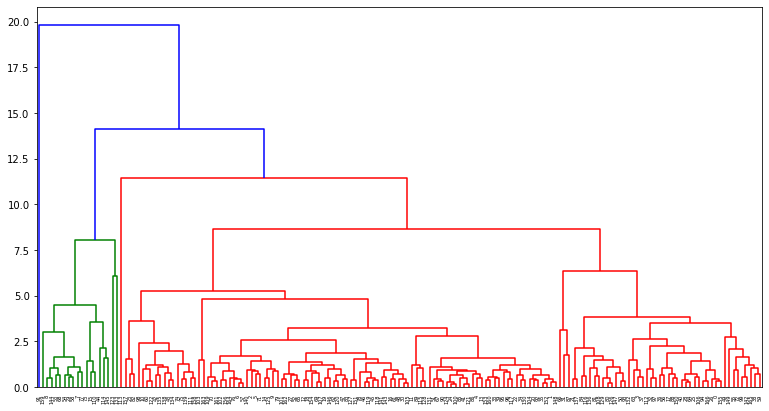

In [270]:
# complete linkage
plt.figure(figsize = (13,7))
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### This dendogram displays 3  formed clusters, let's proceed using 3 number of clusters to see how it works.

In [271]:
# 3 clusters
complete = cut_tree(mergings, n_clusters = 3)
countryo['cluster'] = complete

# clustering the data set based on the final clusters
countryo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


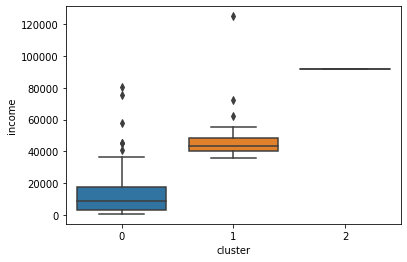

In [272]:
sns.boxplot(x='cluster', y='income', data=countryo)

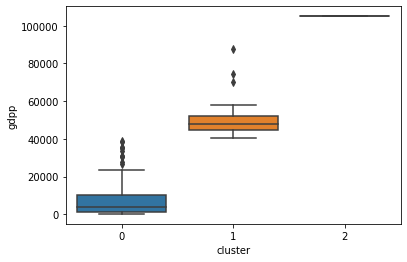

In [273]:
sns.boxplot(x='cluster', y='gdpp', data=countryo)

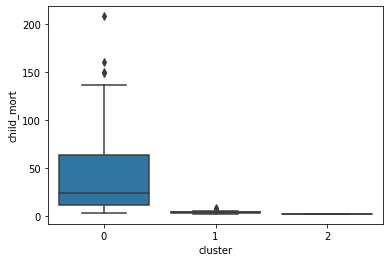

In [274]:
sns.boxplot(x='cluster', y='child_mort', data=countryo)

In [275]:
countryo['cluster'].value_counts()

0    148
1     18
2      1
Name: cluster, dtype: int64

## Finding the top 5 countries using this model for each of income, GDPP & child_mort

### Lets first begin with Income and see which are top 5 countries in need of aid

In [276]:
countryo[(countryo.cluster==0)].sort_values(by = 'income', ascending  = True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0


### Top 5 Countries in need of aid with respect to GDPP

In [277]:
countryo[(countryo.cluster==0)].sort_values(by = 'gdpp', ascending  = True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0


### Top 5 Countries in need of aid with respect to high child mortality

In [278]:
countryo[(countryo.cluster==0)].sort_values(by = 'child_mort', ascending  = False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0


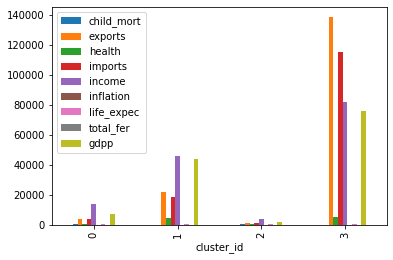

In [279]:
country.groupby('cluster_id').mean().plot(kind = 'bar')

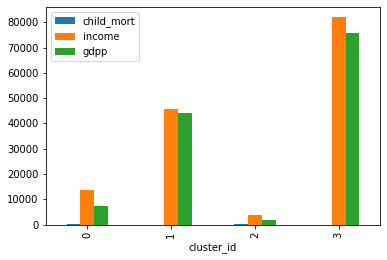

In [280]:
country[['child_mort','income','gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

# Conclusion based on findings on both models:

## 1. Both models Hierarchical & K Mean yeild me same result.
## 2. Same set of countries are suggested by models for analysis on which are countries that are in need of Aid.
### Top 5 countries with referrence to Income, GDPP and Child Mortality in same order are given as follows:

#### Congo, Dem. Rep. & Liberia & Burundi & Niger & Central African Republic
#### Burundi, Liberia, Congo, Dem. Rep., Niger, Sierra Leone
#### Haiti, Sierra Leone, Chad, Central African Republic, Mali